# Equation 4 Hamiltonian - ZXW Diagram and Eigenvalues

This notebook creates a ZXW diagram representing equation 4 from paper 2408:
**Ĥ^jk = F_jk σ̂_+^j σ̂_-^k + F_kj σ̂_-^j σ̂_+^k**

Which decomposes into Pauli strings as: **(F_jk/2) * (X_j X_k - Y_j Y_k)**

We then compute the eigenvalues of this Hamiltonian using the ZXW method.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pyzx as zx
import quimb
# Import ZXW functions
from pauli_hamiltonian_zx import PauliHamiltonianZX


from cor_decay_zxw import (
    compute_F_jk_equation5,
    create_equation4_hamiltonian,
    setup_positions_3d_grid,
    setup_positions_2d_grid
)


## Setup: Atom Positions and F_jk Matrix


In [18]:
# Parameters
N = 4 # Number of atoms (small for visualization)
lambda_val = 1.0  # Wavelength
gam = 1.0  # Decay rate Γ
m = 1.5  # Spacing multiplier

print(f"Setting up {N} atoms in 3D grid")
print(f"Wavelength: {lambda_val}, Decay rate: {gam}")

# Setup 3D grid positions
# x, y, z = setup_positions_3d_grid(N, m, lambda_val)
two_dim_positions = setup_positions_2d_grid(N, m, lambda_val)
print(two_dim_positions)
for i in range(len(two_dim_positions[0])):
    print(f"  Atom {i}: ({two_dim_positions[0][i]:.3f}, {two_dim_positions[1][i]:.3f})")

#for i in range(N):
#    print(f"  Atom {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")


Setting up 4 atoms in 3D grid
Wavelength: 1.0, Decay rate: 1.0
(array([0.  , 0.  , 0.75, 0.75]), array([0.  , 0.75, 0.  , 0.75]), array([0., 0., 0., 0.]))
  Atom 0: (0.000, 0.000)
  Atom 1: (0.000, 0.750)
  Atom 2: (0.750, 0.000)
  Atom 3: (0.750, 0.750)


In [19]:
# Compute F_jk matrix using equation 5
F_matrix = compute_F_jk_equation5(*two_dim_positions, lambda_val, gam)

print(f"F_jk matrix shape: {F_matrix.shape}")
print(f"\nF_jk matrix (real part):")
print(F_matrix)

print(f"\nSample coupling values:")
for j in range(min(3, N)):
    for k in range(j+1, min(3, N)):
        print(f"  F_{j}{k} = {F_matrix[j, k].real:.6f} + {F_matrix[j, k].imag:.6f}i")


F_jk matrix shape: (4, 4)

F_jk matrix (real part):
[[0.+1.5j        0.+0.15198794j 0.+0.15198794j 0.-0.05659477j]
 [0.+0.15198794j 0.+1.5j        0.-0.05659477j 0.+0.15198794j]
 [0.+0.15198794j 0.-0.05659477j 0.+1.5j        0.+0.15198794j]
 [0.-0.05659477j 0.+0.15198794j 0.+0.15198794j 0.+1.5j       ]]

Sample coupling values:
  F_01 = 0.000000 + 0.151988i
  F_02 = 0.000000 + 0.151988i
  F_12 = 0.000000 + -0.056595i


In [20]:
# Create Pauli string Hamiltonian for equation 4
# This uses: (F_jk/2) * (X_j X_k - Y_j Y_k)
pauli_strings = create_equation4_hamiltonian(N, F_matrix)

print(f"Number of Pauli terms: {len(pauli_strings)}")
print(f"\nFirst 6 Pauli strings (showing X_j X_k and -Y_j Y_k pairs):")
for i, (coeff, gates) in enumerate(pauli_strings[:]):
    print(f"  {i+1}: {coeff:.6f} * {gates}")

# Create ZXW Hamiltonian
hamiltonian = PauliHamiltonianZX(pauli_strings)
print(f"\nTotal qubits: {hamiltonian.total_qubits}")


Number of Pauli terms: 20

First 6 Pauli strings (showing X_j X_k and -Y_j Y_k pairs):
  1: 0.000000+0.750000j * ['X0', 'X0']
  2: -0.000000-0.750000j * ['Y0', 'Y0']
  3: 0.000000+0.075994j * ['X0', 'X1']
  4: -0.000000-0.075994j * ['Y0', 'Y1']
  5: 0.000000+0.075994j * ['X0', 'X2']
  6: -0.000000-0.075994j * ['Y0', 'Y2']
  7: 0.000000-0.028297j * ['X0', 'X3']
  8: 0.000000+0.028297j * ['Y0', 'Y3']
  9: 0.000000+0.750000j * ['X1', 'X1']
  10: -0.000000-0.750000j * ['Y1', 'Y1']
  11: 0.000000-0.028297j * ['X1', 'X2']
  12: 0.000000+0.028297j * ['Y1', 'Y2']
  13: 0.000000+0.075994j * ['X1', 'X3']
  14: -0.000000-0.075994j * ['Y1', 'Y3']
  15: 0.000000+0.750000j * ['X2', 'X2']
  16: -0.000000-0.750000j * ['Y2', 'Y2']
  17: 0.000000+0.075994j * ['X2', 'X3']
  18: -0.000000-0.075994j * ['Y2', 'Y3']
  19: 0.000000+0.750000j * ['X3', 'X3']
  20: -0.000000-0.750000j * ['Y3', 'Y3']

Total qubits: 4


In [21]:
# Build the ZXW diagram
print("Building ZXW diagram...")
graph = hamiltonian.build_graph()
print("Graph built successfully")

# Visualize the diagram
print("\nDisplaying ZXW diagram:")
zx.draw(graph)


Building ZXW diagram...
Graph built successfully

Displaying ZXW diagram:


In [22]:
# Simplify the diagram
print("Simplifying ZXW diagram...")
simplified_graph = hamiltonian.simplify_graph()
print("Graph simplified")

# Visualize simplified diagram
print("\nDisplaying simplified ZXW diagram:")
zx.draw(simplified_graph)


Simplifying ZXW diagram...
Graph simplified

Displaying simplified ZXW diagram:


In [40]:
qtn = hamiltonian.to_tensor_network()

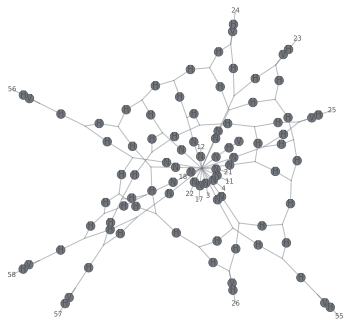

In [42]:
qtn.draw()

In [43]:
H_dense = qtn.to_dense()

print(f"Hamiltonian shape: ")

# 2. Find Eigenvalues using standard Linear Algebra
# Since Hamiltonians are Hermitian, use eigh
vals, vecs = np.linalg.eigh(H_dense)

print("\nEigenvalues:")
print(vals)

# Optional: Plot them
plt.figure()
plt.hist(vals, bins=20)
plt.title("Spectrum of Hamiltonian")
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)